# Algoritmos genéticos multiobjetivo

Algunas ocasiones es útil, o necesario, maximizar más de una función al mismo tiempo. Por ejemplo, se puede querer minimizar simultaneamente el tiempo de fabricación de una herramienta y también su costo.


## 5.1 Manejo de restricciones 

Optimizar $f_i(x) (\forall i = 1,...,n)$

sujeto a $x \in X \subseteq  \mathbb{R}^n $, 

se trata de optimizar simultaneamente $n$ funciones, cuyas variables pueden estar sujetas a ciertas **restricciones**.








In [19]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import random
import numpy as np

In [20]:
# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x**2 for x in individual)

def objective2(individual):
    return sum((x-2)**2 for x in individual)

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,



/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [21]:
# toolbox.register("evaluate", objective1, objective2)
toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidazación si la restricción no se cumple

In [22]:
random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                         halloffame=hof)

gen	nevals	avg                        	std                      	min                      	max                        
0  	50    	[105.828426   119.80038591]	[53.10556747 72.05499406]	[10.69957037 10.02303486]	[259.04663085 354.28531971]
1  	100   	[161.54703601 191.8236222 ]	[37.44872511 60.18334104]	[104.74767374  84.73769134]	[265.05130234 354.28531971]
2  	100   	[216.42700373 257.98740852]	[28.7333707  61.03142418]	[176.21688143 110.88682202]	[282.32596706 388.50954056]
3  	100   	[251.9589021  297.91321197]	[19.38321091 66.15381724]	[213.21634334 137.31401823]	[286.35267644 400.38660423]
4  	100   	[271.87656455 336.43840654]	[10.6447528  44.45101227]	[256.54069041 251.00374746]	[293.37766155 411.92983466]
5  	100   	[284.52768648 343.42860931]	[ 5.8988934 42.5661508]  	[273.81535514 257.8280792 ]	[310.96786473 444.25216032]
6  	100   	[288.79061116 368.25950401]	[ 8.9479155  41.89785703]	[281.34909777 272.21257245]	[327.85686704 444.25216032]
7  	100   	[297.41083963 389.1763561

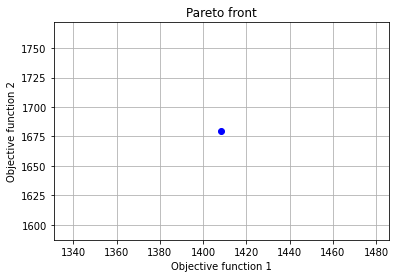

In [23]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()


In [29]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos los pesos de los objetivos. (1.0,) significa maximización.
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Creamos una caja de herramientas para la configuración de la evolución
toolbox = base.Toolbox()

# Registro de funciones de atributo, individuo y población
toolbox.register("attr_float", random.uniform, -10, 10)  # cada atributo es un float en el rango [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de funciones de evolución
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

# Definimos las funciones objetivo
def objective1(individual):
    return sum(x for x in individual) # maximizar la suma de los elementos

def objective2(individual):
    return len(individual) / sum((x+1) for x in individual)  # maximizar la inversa de la suma de los elementos incrementados

# Y las restricciones
def constraint(individual):
    # La suma de los valores del individuo debe ser menor o igual a 2
    if sum(individual) <= 2:
        return True,
    return False,

toolbox.register("evaluate", lambda ind: (objective1(ind), objective2(ind)))
toolbox.decorate("evaluate", tools.DeltaPenality(constraint, 100))  # imponemos una penalidad si la restricción no se cumple


random.seed(64)

NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.3

pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                                             halloffame=hof)



gen	nevals	avg                      	std                      	min                        	max                      
0  	50    	[-0.49298998  1.76432482]	[10.5858704   7.88549618]	[-26.50831436  -4.73132945]	[20.66664687 47.42859976]
1  	100   	[6.4897335  3.62260738]  	[7.25282111 9.92829863]  	[-2.93674703  0.12253562]  	[21.48267643 47.42859976]
2  	100   	[8.51664376 4.94708296]  	[ 8.82126175 11.28158034]	[-2.93674703  0.1183658 ]  	[22.34515943 47.42859976]
3  	100   	[6.70423761 5.52940373]  	[ 8.80763985 11.37089884]	[-2.93674703  0.10785275]  	[24.81570369 47.42859976]
4  	100   	[8.382119   5.77818204]  	[ 9.96367963 11.43809539]	[-2.93674703  0.10514053]  	[25.53323983 47.42859976]
5  	100   	[8.46983921 6.12789618]  	[10.74875146 11.41608252]	[-2.93674703  0.10514053]  	[25.53323983 47.42859976]
6  	100   	[7.34230098 6.36408617]  	[ 9.73974024 11.45080794]	[-2.93674703  0.10133312]  	[26.60532665 47.42859976]
7  	100   	[8.0095965  7.32589897]  	[11.36512139 12.76034287]	[

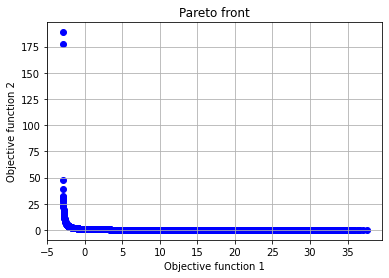

In [30]:
# Graficar el frente de Pareto
front = np.array([ind.fitness.values for ind in hof])
plt.scatter(front[:,0], front[:,1], c="b")
plt.axis("tight")
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.title('Pareto front')
plt.grid(True)
plt.show()

In [ ]:


5.2 Problema de optimización multiobjetivo

5.3 Optimización multiobjetivo con preferencias apriori

5.3.1 Función de agregación 

5.3.2 Programación de metas

5.3.3 Ordenamiento lexicográfico

5.4 Optimización multiobjetivo con preferencias a posteriori

5.4.1 Basados en No-Dominancia de Paretto

5.4.2 Basados en dominancia de Paretto